In [1]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-1seqtule
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-1seqtule
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0f84004a0ede6e4cb87f98edbf46f6c2784b002bd_-cp36-none-any.whl size=126412 sha256=2245b6c60503f19ac163aa32310440602becced703a5b0c33fd4a6463be02267
  Stored in directory: /tmp/pip-ephem-wheel-cache-323lc15q/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [2]:
from numpy import loadtxt
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [4]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [5]:
# load the dataset
from google.colab import files
uploaded = files.upload()
# dataset = loadtxt('ForwardTrain.csv', delimiter=',')
# test = loadtxt('ForwardTest.csv', delimiter=',')

Saving ExtraData.csv to ExtraData.csv


In [6]:
column_names = ['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16', 'T17','T18','T19','Radius','X','Y']
raw_dataset = pd.read_csv('ExtraData.csv', names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,Radius,X,Y
600,318.06,333.08,348.01,362.77,377.25,391.29,404.68,417.10,428.14,437.29,443.90,447.25,446.56,441.10,430.30,413.87,391.97,365.31,335.10,0.04,0.15,0.11
601,319.58,336.14,352.68,369.15,385.47,401.51,417.06,431.80,445.31,456.98,466.05,471.59,472.55,467.87,456.59,438.10,412.34,380.07,342.88,0.04,0.15,0.12
602,320.97,338.98,357.04,375.14,393.27,411.32,429.11,446.37,462.63,477.24,489.33,497.74,501.16,498.13,487.20,467.17,437.44,398.63,352.75,0.04,0.15,0.13
603,322.21,341.49,360.92,380.54,400.37,420.36,440.41,460.25,479.46,497.32,512.81,524.58,531.06,530.58,521.35,501.20,468.23,422.20,365.55,0.04,0.15,0.14
604,323.27,343.66,364.30,385.27,406.67,428.53,450.79,473.27,495.56,516.89,536.00,551.06,560.08,561.72,555.33,538.46,505.51,452.67,382.63,0.04,0.15,0.15


In [7]:
train_dataset = dataset.sample(frac=0.95,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [8]:
train_stats = train_dataset.describe()
for i in range(19,22):
  train_stats.pop(column_names[i])
# train_stats.pop('T1')  
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
T1,575.0,320.844104,14.256363,304.79,310.715,316.49,325.925,387.41
T2,575.0,338.253861,27.952960,306.56,318.245,329.63,348.080,465.95
T3,575.0,354.790383,40.566859,308.28,325.625,342.45,369.135,533.32
T4,575.0,370.021704,51.678900,309.93,332.725,354.38,389.380,592.91
T5,575.0,383.555165,61.040464,311.47,338.595,365.48,408.135,636.43
T6,575.0,395.059478,68.573092,312.88,344.460,374.77,425.530,674.72
T7,575.0,404.268609,74.301317,314.12,348.730,382.42,438.670,698.76
T8,575.0,410.977043,78.292462,315.15,352.525,388.18,449.120,718.01
T9,575.0,415.038713,80.618333,315.93,354.455,391.29,454.885,726.17
T10,575.0,416.368400,81.331781,316.43,355.390,392.06,457.760,731.11


In [ ]:
column_names[19:22]

['Radius', 'X', 'Y']

In [9]:
train_labels = train_dataset[column_names[20:21]]
test_labels = test_dataset[column_names[20:21]]
train_data = train_dataset[column_names[0:19]]
test_data = test_dataset[column_names[0:19]]
train_data.tail()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19
571,346.19,389.52,433.06,476.78,520.43,563.43,604.61,642.03,672.98,694.59,705.46,706.32,697.14,674.72,636.43,583.66,520.43,450.76,377.62
128,321.14,338.25,353.40,365.82,375.03,380.87,383.49,383.28,380.78,376.49,370.92,364.45,357.39,349.95,342.28,334.49,326.64,318.77,310.89
28,313.45,323.56,332.99,341.41,348.49,353.99,357.73,359.65,359.81,358.37,355.56,351.64,346.87,341.44,335.56,329.34,322.91,316.34,309.69
183,319.57,335.95,351.91,367.18,381.40,394.15,404.90,413.12,418.29,420.06,418.29,413.12,404.90,394.15,381.40,367.18,351.91,335.95,319.57
459,326.97,350.92,374.83,398.60,422.09,445.02,466.96,487.27,505.07,519.24,528.48,531.47,527.06,514.51,493.70,465.21,430.28,390.49,347.53


In [10]:
#Normalizing the model
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)
normed_test_data.tail()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19
543,0.546836,0.555438,0.569914,0.589569,0.612624,0.636992,0.659765,0.678519,0.691298,0.696549,0.693891,0.683567,0.667036,0.646223,0.623524,0.601774,0.582975,0.568995,0.560528
544,0.876514,0.889929,0.912558,0.943099,0.979102,1.016587,1.051682,1.080602,1.100014,1.107951,1.103428,1.087249,1.061259,1.028745,0.993294,0.959162,0.929726,0.907719,0.894468
551,-0.351008,-0.351085,-0.351774,-0.351627,-0.350672,-0.348526,-0.344793,-0.339586,-0.333407,-0.326298,-0.318703,-0.310890,-0.303224,-0.295902,-0.289159,-0.282989,-0.277416,-0.273287,-0.270769
559,1.988999,2.039360,2.124138,2.242468,2.389314,2.556404,2.731330,2.899423,3.046593,3.163973,3.248557,3.298394,3.307599,3.273914,3.205463,3.119331,3.034180,2.965422,2.921553
599,-0.305415,-0.298497,-0.285957,-0.266873,-0.240089,-0.204446,-0.159467,-0.105081,-0.041786,0.029160,0.105749,0.185376,0.264825,0.340999,0.410526,0.471104,0.520360,0.557040,0.580422


In [11]:
#Building the model
def build_model(neurons_1,neurons_2,act):
  model = keras.Sequential([
    layers.Dense(neurons_1, activation=act, input_shape=[len(train_data.keys())]),
    layers.Dense(neurons_2, activation=act, input_shape=[len(train_data.keys())]),
    layers.Dense(1)  
     ])

  optimizer = tf.keras.optimizers.RMSprop(0.0005)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [12]:
model = build_model(128,128,'relu')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 19,201
Trainable params: 19,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[42.092876],
       [41.959415],
       [38.603363],
       [37.997234],
       [31.934042],
       [41.06089 ],
       [45.914383],
       [55.82045 ],
       [53.77173 ],
       [61.767452]], dtype=float32)

In [13]:
EPOCHS = 2300

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0379,  mae:0.0820,  mse:0.0379,  val_loss:0.0020,  val_mae:0.0374,  val_mse:0.0020,  
....................................................................................................
Epoch: 100, loss:0.0006,  mae:0.0152,  mse:0.0006,  val_loss:0.0005,  val_mae:0.0148,  val_mse:0.0005,  
....................................................................................................
Epoch: 200, loss:0.0001,  mae:0.0078,  mse:0.0001,  val_loss:0.0001,  val_mae:0.0055,  val_mse:0.0001,  
....................................................................................................
Epoch: 300, loss:0.0001,  mae:0.0052,  mse:0.0001,  val_loss:0.0000,  val_mae:0.0045,  val_mse:0.0000,  
....................................................................................................
Epoch: 400, loss:0.0000,  mae:0.0044,  mse:0.0000,  val_loss:0.0000,  val_mae:0.0057,  val_mse:0.0000,  
........................................................................

In [ ]:
#  EPOCHS = 1000
# # The patience parameter is the amount of epochs to check for improvement
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

# history = model.fit(normed_train_data, train_labels, 
#                     epochs=EPOCHS, validation_split = 0.2, verbose=0, 
#                      callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0002,  mae:0.0102,  mse:0.0002,  val_loss:0.0001,  val_mae:0.0100,  val_mse:0.0001,  
....................................................................................................
Epoch: 100, loss:0.0002,  mae:0.0094,  mse:0.0002,  val_loss:0.0000,  val_mae:0.0048,  val_mse:0.0000,  
.............................

In [14]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
2295,0.000019,0.002571,0.000019,0.000015,0.002623,0.000015,2295
2296,0.000009,0.001925,0.000009,0.000011,0.002268,0.000011,2296
2297,0.000009,0.001940,0.000009,0.000047,0.004580,0.000047,2297
2298,0.000014,0.002277,0.000014,0.000017,0.002874,0.000017,2298
2299,0.000010,0.002008,0.000010,0.000009,0.001801,0.000009,2299


In [15]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Params]')

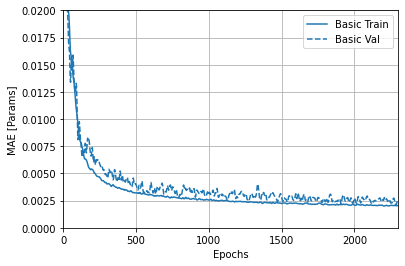

In [ ]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 0.02])
plt.ylabel('MAE [Params]')

Text(0, 0.5, 'MSE [Params^2]')

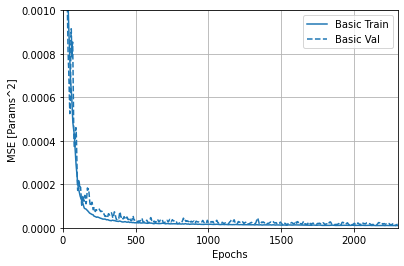

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 0.001])
plt.ylabel('MSE [Params^2]')

Text(0, 0.5, 'MAE [Params]')

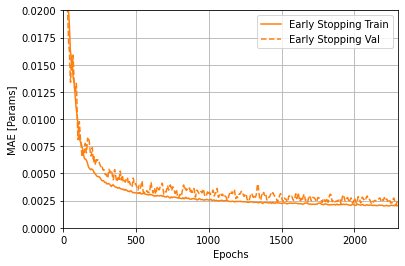

In [ ]:
plotter.plot({'Early Stopping': history}, metric = "mae")
plt.ylim([0, 0.02])
plt.ylabel('MAE [Params]')

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} meter".format(mae))

Testing set Mean Abs Error:  0.00 meter


In [ ]:
test_predictions = model.predict(normed_test_data)
test_predictions_flat = model.predict(normed_test_data).flatten()
np.shape(test_predictions)
test_predictions

array([[0.04871999],
       [0.10909012],
       [0.10909857],
       [0.11739981],
       [0.12763636],
       [0.14572965],
       [0.05846465],
       [0.0691908 ],
       [0.08700699],
       [0.09616379],
       [0.10993873],
       [0.04792949],
       [0.06485592],
       [0.07589804],
       [0.08822733],
       [0.10809486],
       [0.14521118],
       [0.07749283],
       [0.09944113],
       [0.10920827],
       [0.11844279],
       [0.14008921],
       [0.04820731],
       [0.0701019 ],
       [0.08825025],
       [0.09935921],
       [0.09951369],
       [0.10843864],
       [0.10802254],
       [0.14563444]], dtype=float32)

In [16]:
np.shape(test_labels)
test_labels_flat = test_labels.values.flatten()

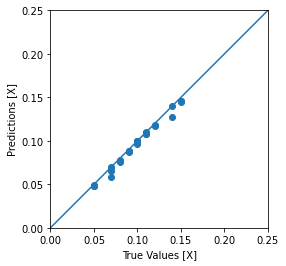

In [ ]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels['X'], test_predictions_flat[0:1133:1])
plt.xlabel('True Values [X]')
plt.ylabel('Predictions [X]')
lims = [0,0.25]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

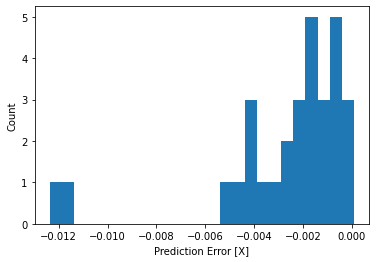

In [ ]:
error = test_predictions_flat[0:1133] - test_labels_flat[0:1133]
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [X]")
_ = plt.ylabel("Count")

In [17]:
def lsr(x,y):
  diff = x-y
  return np.sum(np.square(diff))

In [18]:
def rsquare(x,y):
  std = np.std(y)
  least_square = lsr(x,y)
  return (std-least_square)/std

In [ ]:
lsr(test_labels['X'],test_predictions[:,0])

0.0004578093997700049

In [ ]:
rsquare(test_labels['X'],test_predictions[:,0])

0.9837965463261538

In [23]:
import math
sigmas = np.linspace(0.01,0.3,30)
corrs =[]
for sigma in sigmas:
  noise = np.random.normal(0, sigma, normed_test_data.shape)
  noisy_test_data = normed_test_data+noise
  loss, mae, mse = model.evaluate(noisy_test_data, test_labels, verbose=0)
  test_predictions = model.predict(noisy_test_data)
  test_predictions_flat=test_predictions.flatten()
  error = test_predictions_flat[0:1133] - test_labels_flat[0:1133]
  corr = rsquare(test_labels['X'],test_predictions[:,0])
  corrs.append(corr)

In [24]:
corrs

[0.990127077584868,
 0.9826042728010629,
 0.9811991273167053,
 0.9372823915688342,
 0.9350535736369147,
 0.9491380828838507,
 0.946153385481485,
 0.9310445760704288,
 0.8899001708149648,
 0.884254170296471,
 0.895000116344298,
 0.7774784346405822,
 0.514313638591582,
 0.8259615871627,
 0.7523590548443811,
 0.5293954570317055,
 0.3921816653460012,
 0.8411026763047611,
 0.7028364868604866,
 0.7938352915952324,
 0.7425344467158079,
 0.5179108624265072,
 0.6582015612430051,
 0.7109834560010375,
 0.413775341453652,
 0.5647829318634511,
 0.3827157365376116,
 0.5127000391942296,
 0.41073678363329325,
 0.10562981789640105]

Text(0, 0.5, 'Correlation co efficient')

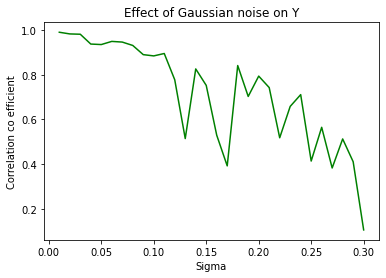

In [26]:
plt.title("Effect of Gaussian noise on Y")
plt.plot(sigmas, corrs,c="green")
plt.xlabel('Sigma')
plt.ylabel('Correlation co efficient')
